# 課程大綱
+ 教材有的效期限
+ 模組的本質
+ 虛擬環境
+ 爬蟲概論
+ requests 爬蟲
+ colab 不能跑 selenium

不用抄，下課之前會給這份檔案

## 教材的有效期限
這 3 次的課程，基礎的觀念不太會變化，要爬的網站也是特別挑過不太會改版的，因此保存期限保守估計也有半年，如果現在沒空，甚至學期結束之前都沒有空，只要把講義保存下來，之後都可以慢慢學。

## 模組的本質
模組(module)就是其他 py 檔

把會重複用到的變數、函式或類別(class)，專門用一個 py 檔存起來，這個 py 檔就是模組

In [1]:
# 例如我在這個檔案的同一個資料夾裡面，創一個 pa.py，裡面只有一個叫 nai 的函式，只要呼叫這個函式就會 return '沒了'
# import 模組
# 模組名稱就是 py 檔的檔名
import pa
print(pa.nai())

沒了


In [2]:
# from 模組 import 函式
from pa import nai
print(nai())

沒了


## 套件 vs 模組
資料夾裡面有多個 py 檔，且有一個空白的__init__.py，就是一個套件(Package)

心裡知道兩者的差異就好，平常口語上我都叫模組

In [1]:
# 我在這個檔案的旁邊創一個名叫 test_package 的資料夾，裡面有兩個檔案，一個是空白的 __init__.py，另一個是 sing.py
# 這個套件名稱就是 test_package，裡面有名叫 sing 的模組
# sing 裡面只有一個名叫 song 的函式，只要呼叫這個函式就會 print 固定的兩句歌詞

# import 套件.模組
import test_package.sing

# 套件.模組.函式()
test_package.sing.song()

吸氧依舊那麼沒力
明天還是好天氣


In [4]:
# from 套件 import 模組
from test_package import sing
sing.song()

吸氧依舊那麼沒力
明天還是好天氣


In [5]:
# from 套件.模組 import 函式
from test_package.sing import song
song()

吸氧依舊那麼沒力
明天還是好天氣


### 開發模組的人
自己、python 內建、第三方社群

+ python 內建模組

  不用自己安裝，這些模組會隨著 python 版本更新

+ 第三方社群

  需要自己安裝，例如 numpy、pandas，會在 pypi 和 github 上有專門的頁面，模組的使用說明書可能在 github，開發團隊也可能會另外做一個網站

### 尋找模組
如果有想要實現的功能，就去找能提供這個功能的模組，模組要怎麼找?
1. 問 ChatGPT、Grok 或 Gemini 要用 python 做某件事，推薦使用什麼模組(不推薦用 Claude 是因為他不能連網)
2. google 看看找到的文章推薦哪些模組、這些模組之間的比較

### 挑選模組的標準
模組不是隨便哪個都好，大致上有幾個判斷標準

先把候選模組的 pypi 挖出來，以 pandas 為例
https://pypi.org/project/pandas/

1. 確認是否還有在持續維護或開發，年久失修的就不要用了(例如 https://pypi.org/project/bopomofo/ )，除非你會修
2. 看 github 的受歡迎程度(fork 數和星星數)
3. 比較這些模組的功能，選功能比較齊全或符合需求的
4. 看官方文件，選自己比較能看懂的

比較受歡迎的模組代表網路上有比較多資料可以查，就算看不懂官方文件也還學得會；當然看得懂官方文件是最好，因為有些模組雖然很受歡迎但網路上沒什麼資料，例如 Django 5 的教學。

雖然 AI 老師應該是什麼都會，但還是要注意版本問題。有些比較舊的語法在新版已經不存在，有些比較新的語法在舊的版本還沒開發出來。無論如何都還是要 google 複查，他們還是有可能瞎掰。

### 太冷門的模組有可能不是好東西

有些駭客會在 py 檔裡面藏會執行某些有害的語法。這種模組就是木馬，至於木馬裡面藏了什麼不一定，取決於攻擊者想幹嘛。2023年11月新聞例子 https://www.ithome.com.tw/news/159921 ，pypi 官方也在2024年8月開始掃描並抓出這類型的惡意專案 https://www.ithome.com.tw/news/166832 。

另一種攻擊手法是借屍還魂，有些專案已經下架，駭客直接拿相同名字再註冊一次( https://www.ithome.com.tw/news/164865 )。還有一種駭客藉由偽裝誤導 AI 搜尋引擎推薦給使用者( https://www.ithome.com.tw/news/164240 )。

### 安裝模組
凡是要安裝模組，都要先啟動虛擬環境，然後在虛擬環境中安裝。python 的模組在電腦裡是用資料夾裝起來的，安裝模組就是把模組的資料夾放進虛擬環境的資料夾裡面。

## 虛擬環境
虛擬環境是 python 執行的環境，在剛安裝好的時候只會有一個 base。建立好的虛擬環境之間互相獨立，如果有某個環境壞了，不會影響到其他環境。虛擬環境只是一個環境，和專案是獨立的，可以把專案放在任何地方，用任意環境來執行專案。

因為模組相容性問題，不太可能所有模組都裝在同一個虛擬環境而不發生錯誤，因此建議多開幾個虛擬環境。如果所有模組都裝在 base，發生相容性問題的話，只能把 python 從電腦移除再重裝，但如果是發生在某個虛擬環境，只要把這個虛擬環境刪掉再創一個新的就好。災害擴散程度和修復時間少非常多。

我個人建議 base 就讓他維持原樣，1 個通用、n 個專案用、n 個 AI 用。

+ 通用環境安裝所有會用到的模組的最新版本，如此這個環境可以偵測相容性問題，但實際上是什麼跟什麼撞到就要另外做實驗。
+ 理想上是每個專案開一個虛擬環境，但每開一個虛擬環境，都需要幾 GB 的容量，所以我個人做法是同類型的專案共用同一個虛擬環境。
+ StableDiffusion (AI算圖) 自己一個環境、Ollama (本機LLM) 自己一個環境
+ 其他用到深度學習模組的模組，例如 ckiptagger ，很容易因為 tensorflow 使用的 numpy 版本和 ckiptagger 不一樣而不能跑。

### 建立虛擬環境
下面兩種方法對電腦來說等價。Anaconda Navigator 有使用者介面，新手比較知道自己在幹嘛
+ 用 Anaconda Navigator 建立 (新手推薦)

  打開 Anaconda Navigator → Environments → Create → 輸入虛擬環境名稱和 python 版本(建議3.11) → 確定

+ 用 cmd 建立

  conda create –n 虛擬環境名稱 python=版本號

虛擬環境是一個資料夾，裡面有安裝的模組和 python.exe。切換虛擬環境則是啟動不同環境裡面的 python.exe、調用那個環境裡面的模組。

### 啟動虛擬環境
+ 用 Anaconda Navigator 啟動 (新手推薦)

  打開 Anaconda Navigator → Environments → 選擇虛擬環境 → 按綠色圓圈裡面的白色三角形 → Open Terminal

+ 用 cmd 啟動 (限 Windows，Mac 和 Linux 我不會)

  打開命令提示字元(cmd) → cd C:\Users\使用者名稱\anaconda3\envs → activate 虛擬環境名稱

兩種做法對電腦來說等價，最後會看到路徑前面有一個「(虛擬環境名稱)」，這樣就表示已經啟動這個虛擬環境，此時輸入安裝指令即可。

我一開始是用 Anaconda 安裝 python，所以路徑才會是那樣，如果是用其他方式安裝 python，路徑會不一樣，但無論怎麼安裝，想辦法找到 python.exe 就對了。

### 輸入安裝指令
pip install 模組

如果當初是用 Anaconda 安裝 python 的話，可以用 conda install 模組

pip 和 conda 的差異在於，pip 會直接裝最新的；conda 會選擇相容性最高的版本安裝，而且在安裝之前會把要變更的東西都列出來，你確認之後他才會執行。

我 2023/4/3 測試，在 python 版本 3.11.2 的情況下，只要不是機器學習相關的模組，全部都用 pip 沒有問題；機器學習相關的模組建議另外開一個虛擬環境來放。最近有一些不確定因素所以我不敢亂升版，就沒有這樣測試了。

例如 pandas 2.0 版之後把底層從 C 改成 Pyarrow，可是他們有一些功能還沒有做好、有的功能有 bug，目前確定 2.2.0 版還有，現在最新是 2.2.3，從 2024/9/20 釋出至今已 8 個月仍沒有更新版，或許已經穩定了，但是 3.0 已開發 97%，預計等到 3.0 出了之後再來決定要升到多少，到時候再做全面的測試。現在的話，除非有強烈建議用 pip 的狀況，否則我會建議用 conda 來裝模組

In [1]:
# 先裝上這兩個模組吧
# 經測試，這兩個裝最新的最好
! pip install requests
! pip install beautifulsoup4

## 爬蟲的本質
自動抓網路資料

手動可以進的地方，爬蟲都可以進；手動不能進的地方，爬蟲都不能進

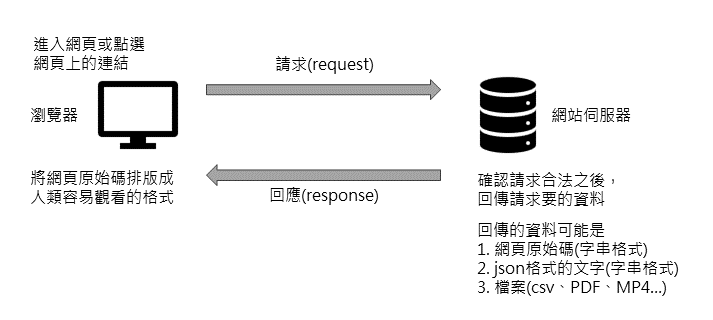

爬蟲就是把上面需要手動的過程變成由電腦執行。

## 網站的立場：給真人看資料
+ 除非是想直接送資料的，否則都會想辦法區辨真人和爬蟲，並且擋掉爬蟲
+ 區辨爬蟲的方法各網站都不同，而且不會告訴你，要自己做實驗去猜/測出來
+ 網站擋爬蟲的設計稱為防爬機制，爬蟲方要想辦法突破或繞過這些障礙取得資料
+ 伺服器會記錄和自動判斷，同一個 IP 或帳號在短時間之內送請求幾次就暫時 ban 掉(台灣證券交易所 2 小時、IG 約 24 小時)
+ 大部分網站看 IP，一定要登入才給看資料的就是看帳號(例如 IG)
+ 有些網站是 ban 幾次就凍結帳號(例如 IG)

## 爬蟲的精神：低調
由於網站會阻擋，爬蟲必須要盡量把自己偽裝成真人，將自己藏進人群之中，讓網站伺服器無法偵測出來，如此遂行抓取資料的目的。為了偽裝成真人，有 3 件事情要注意：
+ 用盡量少的請求取得盡量多的資料
  + 送的請求越少，越難以被伺服器用請求頻率的判斷方式偵測出來。
    + 開發時使用 .ipynb 優於使用 .py
  + 另外，本機處理資料的速度，遠大於送請求等伺服器回應的速度。
    1. 抓下整個網頁的資料，再取出自己需要的部分
    2. 每次請求盡量多的資料，抓下來再取出自己要的部分

+ 不要高頻送請求
  + 人類的手不可能這麼快，所以一定不是人。
  + 另外，高頻送請求算是一種阻斷服務攻擊 (DoS)，如果很多人同時 DoS 就是分散式阻斷服務攻擊 (DDoS)，為了自保，伺服器一定會 ban 掉攻擊他的 IP 或帳號。

+ 爬蟲程式加上一些偽裝
  + 在使用爬蟲模組的時候，多加幾行語法就可以減少被發現的風險，詳細後述。

## 爬蟲的開發環境
如同其他類型的專案，爬蟲專案最好是開一個專用的虛擬環境。爬蟲模組本身並不需要擔心模組相容性的問題，但如果爬蟲專案會用到機器學習模組，例如 Tensorflow 或 Pytorch，就很容易因為 numpy 版本不合導致無法使用，因此才會建議開一個專門的虛擬環境來用。

另外，在開發爬蟲的時候，建議使用 .ipynb，因為 .ipynb 可以分 cell 執行，在一個 cell 抓到資料之後，在另一個 cell 慢慢定位，等到整個都開發完之後，再開一個 .py 把程式碼貼過去就好。如果從頭到尾都用 .py 開發，在開發的過程中就會一直送請求，有被發現甚至被 ban 的危險。


## 爬蟲專案常用模組
+ 爬蟲的目的是自動抓資料，單就抓資料這件事本身，常用的是 requests、selenium、pandas。
+ 每一次送請求間隔時間不同用 sleep + random。
+ 在爬蟲執行過程中如果想知道目前的進度，就用 tqdm。
+ 抓到資料要解析，網頁原始碼用 Beautifulsoup、json 格式字串用 json 或 pandas、csv 檔用 pandas。
+ 在對抓到的資料做前處理，或是決定要抓哪些資料的時候，可能會用 re 抓字串，用 datetime 處理時間。
+ 爬蟲有什麼發現要通知自己時，寄信用 SSL+smtplib+email，LINE 通知用 LINE bot，Telegram 通知用 Telegram Bot，或是用 tkinter、PyQt6 或 gradio 寫桌面 APP。
+ 抓到資料要存起來時，通常會用 pandas。當存的檔案不只一個，或是要讀取某些記錄時，就需要用 os、glob 協助管理檔案。
+ 當爬蟲模組無法攻破某些網站時，用 pyautogui 寫外掛，代價是會失去電腦控制權，但可以用 tkinter 製作遙控器，讓自己隨時可以暫停。
    + 此種作法隨著時代進步，慢慢有使用 AI-agent 控制電腦來做到一樣事情的趨勢，但比較浪費電


## 網頁三元素
一個網頁可能包含三種語法：HTML、CSS、JavaScript。

網頁開發者用 HTML 寫內容，用 CSS 排版，用 JavaScript 實現互動功能。

對爬蟲來說，HTML 是資料，用 CSS 定位，JavaScript 有點礙事。

![alt text](<HTML vs CSS.jpg>)
![alt text](JavaScript.jpg)

## 爬蟲的 SOP
1. 判斷是否有爬取的必要性：了解想要爬的網頁有哪些內容、尋找有沒有更好的資料來源
2. 打開開發人員工具（以 Edge 和 chrome 為例）
3. 觀察網頁架構，找出定位點
4. 送請求取得網頁原始碼
5. 從網頁原始碼抓出要的資料

## 開啟 chrome 開發人員工具
要寫爬蟲，第一件事情就是要先了解想要爬的網站長怎樣、網頁原始碼長怎樣，所以要先在網站上面逛逛，然後打開開發人員工具看網頁原始碼。

chrome 瀏覽器有開發人員工具，打開的方法有 3 種：
1. 按 F12
2. 按 Ctrl + Shift + I
3. 瀏覽器右上方的「...」→更多工具→開發人員工具

開發人員工具會呈現在畫面右邊，可以拖拉改變畫面占比。有些網頁會把某些按鍵鎖起來，因此 3 種方法都有可能用到

## 開發人員工具簡介1
最常用到的是元素(element)，這邊會看到現在畫面的網頁原始碼。當想要尋找畫面上某個東西在網頁原始碼的位置時，按元素左邊的箭頭按鈕→把滑鼠移動到想定位的東西上→按一下滑鼠左鍵，網頁原始碼就會跳到指定東西的位置。

## requests 爬蟲的 SOP
現在我們要準備寫一隻最簡單的爬蟲，這隻爬蟲會用到 requests 和 BeautifulSoup 兩個模組。一個 requests 爬蟲的標準作業程序如下面 5 行：

首先匯入模組
```python
import requests
from bs4 import BeautifulSoup

url = '網址' # 指定要抓資料的網址
r = requests.get(url) # 送請求、並將伺服器的回應存進 r 變數
soup = BeautifulSoup(r.text, 'html.parser') # 用 BeautifulSoup 解析回應的內容。r.text 是取得伺服器回應的內容，如果伺服器回傳的是 HTML 格式，就用 html.parser
```

## 爬蟲練習1 - get 請求
現在我們要在 PTT 熱門看板( https://www.ptt.cc/bbs/hotboards.html )，找出人氣大於 1000 的板有哪些。

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.ptt.cc/bbs/hotboards.html'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

# 如果直接把 r 印出來，會看到 Response [200]，意思是回應碼 200，200 代表成功。
# 如果印出 r.text，會看到字串型態的網頁原始碼
# BeautifulSoup 會識別這串文字裡面的標籤，有助於定位出想要的資料位置。如果把 soup 印出來，會看到字串變成有排版的網頁原始碼。


In [4]:
# 看看直接印出 r 是什麼
print(r)

<Response [200]>


In [4]:
# 看看字串型態的網頁原始碼長怎樣
print(r.text)

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>熱門看板 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/contact.html">聯絡資訊</a>
	</div>
</div>

<div id="main-container">
	<div id="action-bar-container">
		<div class="action-bar">
			<div class="b

In [5]:
# 看看 BeautifulSoup 解析出來的東西長怎樣
print(soup)

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>熱門看板 - 批踢踢實業坊</title>
<link href="//images.ptt.cc/bbs/v2.27/bbs-common.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-custom.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print" rel="stylesheet" type="text/css"/>
</head>
<body>
<div id="topbar-container">
<div class="bbs-content" id="topbar">
<a href="/bbs/" id="logo">批踢踢實業坊</a>
<a class="right small" href="/about.html">關於我們</a>
<a class="right small" href="/contact.html">聯絡資訊</a>
</div>
</div>
<div id="main-container">
<div id="action-bar-container">
<div class="action-bar">
<div class="btn-group btn-group-cls">
<a 

### 定位-找出想要的資料
從網頁原始碼定位出想要的資料有兩種方式：
1. find 和 find_all
2. CSS selector

兩種方式的定位能力相似，但 CSS selector 在之後用 selenium 的時候也通用，因此如果只想學一種，建議學 CSS selector。

#### find 和 find_all
find 和 find_all 相較 css selector 較容易學，通式如下：
```python
soup.find('標籤', {'class': '值'}) # 回傳 HTML 中第一個指定的標籤。
soup.find_all('標籤', {'class': '值'}) # 回傳 HTML 中全部指定的標籤，型態為串列
```
一個標籤可能有多種屬性(attribute)，例如 class、href，可以指定或不指定屬性

class 是其中一種屬性(attribute)，可以指定非 class 的屬性，也可以不指定屬性

In [12]:
# 以 PTT 熱門看板為例
all_boards = soup.find_all('div', {'class':'b-ent'}) # 找出所有屬性 class 為 b-ent 的 div 標籤，這代表畫面上的每一個板
for board in all_boards: # 遍歷這些板
#     # 找到這個板的第一個屬性 class 為 board-name 的 div 標籤，取其內容(.text)，並存進 name 變數中
    name = board.find('div', {'class':'board-name'}).text

    # 找到這個板的第一個屬性 class 為 board-nuser 的 div 標籤，取其內容(.text)，並存進 user_count 變數中
    user_count = board.find('div', {'class':'board-nuser'}).text

    if int(user_count) >= 1000: # 如果該板人氣大於等於 1000 人
        print(name, user_count) # 就印出板名和人氣值


Gossiping 8051
Stock 5875
Baseball 4923
C_Chat 3384
NBA 1547
HatePolitics 1064


#### CSS selector 1
BeautifulSoup 用來定位 css selector 的語法有兩種：
```python
soup.select_one('定位規則') # 回傳第一個符合語法規則的元素
soup.select('定位規則') # 回傳一個串列，包含所有符合語法規則的元素
```
當定位規則只能找出一個元素的時候，使用 select_one 會比較快，其他時機使用 select 就好。


In [ ]:
# 以 PTT 熱門看板為例
all_boards = soup.select('div[class="b-ent"]')
for board in all_boards:
    name = board.select_one('div[class=board-name]').text
    user_count = board.select('div[class=board-nuser]')[0].text

    if int(user_count) >= 1000:
        print(name, user_count)

# 跟使用 find 的寫法相比，因為是得到串列，所以指定第一個元素，除了屬性不是用字典形式裝起來，寫法幾乎相同。
# class名稱可以不使用引號框起來，可以減短一些，且避免雙層引號的錯誤

Gossiping 8051
Stock 5875
Baseball 4923
C_Chat 3384
NBA 1547
HatePolitics 1064


### requests 爬蟲偽裝
其實你在送請求的時候已經被發現不是人了。

我們用瀏覽器看網頁的時候，會附著一個 header，header 就是瀏覽器版本，你可以想像成是戴著一個帽子。剛剛的爬蟲程式戴的帽子可以用 r.request.headers
顯示出來

In [15]:
# 看看送給對方的 header
r.request.headers

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

也就是說，帽子上就直接寫「我是python」所以就只是網站管理員想不想要擋的問題而已。PTT 不擋，其他網站可不一定這麼仁慈，因此為了慎重起見，我們還是要做個偽裝。偽裝的目標就是我們平常用瀏覽器的時候的 header。

這個 header 在開發人員工具 → Network → 名稱裡的第一個 → 要求標頭 → User-Agent。複製下來之後做成字典的格式，例如
```python
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36'}
```
仔細看內容會發現那些開頭都是瀏覽器的名稱

然後在送請求的時候加上去即可，其他程式碼都不用改，語法如下：
```python
r = requests.get(url, headers=header)
```

In [16]:
# 由於有些伺服器會看到 python 就直接不給回應，需要一點偽裝
import requests
from bs4 import BeautifulSoup

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36'}

url = 'https://www.ptt.cc/bbs/hotboards.html' # 指定網址
r = requests.get(url, headers=header) # 送請求、並將伺服器的回應存進 r 變數
r.request.headers

# 現在爬蟲的 header 就跟瀏覽器一樣了

{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

## colab 不能跑 selenium，只能在自己電腦上裝編輯器

# 下集預告
+ 自動更新 header
+ 網頁編碼
+ json
+ post 請求
+ API
+ 3 個爬蟲模組
+ pandas 爬蟲
+ 下載 driver

# 下下集預告
+ selenium 爬蟲
+ 進度條
+ 下載檔案
+ 等待連線
+ 例行爬蟲
+ 驗證碼
+ 爬蟲的種類
+ 爬蟲的智慧財產權問題
+ 好用模組推薦
+ 其他學習資源